In [1]:
import numpy as np
import pandas as pd
import geopy
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from pylab import *
from numpy import random
import pdb


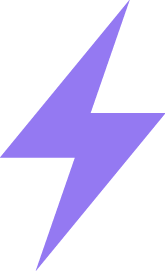

Running local mode, some functionality limited.



In [2]:
##### First Install Lightning using the "pip install lightning-python" Command on the C:\> Command line #######
from lightning import Lightning
lgn = Lightning(ipython=True, local=True)

In [3]:
sixty = pd.read_csv('india.csv')

In [4]:
sixty.head()

Name       State  Population rank (core city)  \
0  Thiruvananthapuram      Kerala                          NaN   
1              Kollam      Kerala                          NaN   
2             Madurai  Tamil Nadu                          NaN   
3               Kochi      Kerala                          NaN   
4            Thrissur      Kerala                          NaN   

   Population rank (Primary Statistical Area)  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

   Distance to closest larger Chinese Metropolitan Area (KM)  Power  \
0                                                NaN            NaN   
1                                                NaN            NaN   
2                                                NaN            NaN   
3                                                NaN            NaN   
4                                                NaN            NaN   

   Population MetropolitanArea  Population MetroPower  \
0                      1679754                    NaN   
1                      1110668                    NaN   
2                      1465625                    NaN   
3                      2119724                    NaN   
4                      1861269                    NaN   

   Rolling population total  GDP per capita of Province  \
0                 126344932                         NaN   
1                 156501291                         NaN   
2                 134109162                         NaN   
3                 109830560                         NaN   
4                 117655484                         NaN   

   Distance from a foreign country (KM)  Score  \
0                                   NaN    NaN   
1                                   NaN    NaN   
2                                   NaN    NaN   
3                                   NaN    NaN   
4                                   NaN    NaN   

   If part of a larger city's transportation, city name  Closest City Name  \
0                                                NaN                   NaN   
1                                                NaN                   NaN   
2                                                NaN                   NaN   
3                                                NaN                   NaN   
4                                                NaN                   NaN   

   Closest City Rank  Largest in Province?  Latitude  Longitude  
0                NaN                   NaN      8.50      76.95  
1                NaN                   NaN      8.88      76.60  
2                NaN                   NaN      9.90      78.10  
3                NaN                   NaN      9.97      76.28  
4                NaN                   NaN     10.52      76.21

# DBSCAN

In [5]:
def dbscanner(x, y, a, b):
    from sklearn.cluster import DBSCAN
    dbscan = DBSCAN(eps = a, min_samples = b)
    dbscan.fit(X)
    labels = dbscan.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
    import numpy as np
    core_samples = np.zeros_like(labels, dtype = bool)  
    core_samples[dbscan.core_sample_indices_] = True 
    print(core_samples)
    unique_labels = np.unique(labels)
    colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

    for (label, color) in zip(unique_labels, colors):
        class_member_mask = (labels == label)
        n = X.loc[class_member_mask & core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 10)

        n = X.loc[class_member_mask & ~core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 5)

    plt.show()

## 60 Largest Cities

In [6]:
sixty = pd.read_csv('india.csv')
X = sixty[['Latitude','Longitude']]
x = sixty['Latitude']
y = sixty['Longitude']
labels = sixty['Name']
lgn.scatter(x, y, labels = sixty['Name'])

Silhouette Coefficient: 0.293
Estimated number of clusters: 8
Homogeneity: 0.515
Completeness: 1.000
V-measure: 0.680
[ True  True  True  True  True  True  True  True  True False False False
 False False False  True  True  True  True  True  True False  True  True
 False  True  True  True  True  True False  True  True  True  True  True
  True  True False  True False  True  True  True  True  True  True  True
  True  True  True  True False]


/home/matthew/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


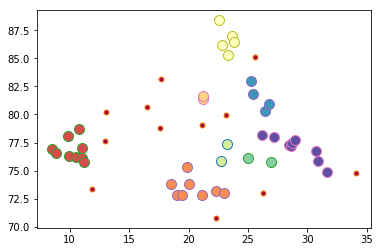

In [7]:
dbscanner(x, y, 2, 2)

Silhouette Coefficient: 0.284
Estimated number of clusters: 3
Homogeneity: 0.189
Completeness: 1.000
V-measure: 0.317
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]


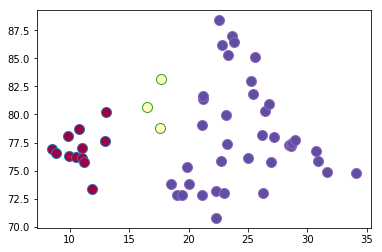

In [8]:
dbscanner(x, y, 3, 2)

# Subcontinent

In [9]:
subcontinent = pd.read_csv('indiansubcontinent.csv')

In [10]:
X = subcontinent[['Latitude','Longitude']]
x = subcontinent['Latitude']
y = subcontinent['Longitude']

In [11]:
lgn.scatter(x, y, labels = subcontinent['Name'])

Silhouette Coefficient: 0.235
Estimated number of clusters: 9
Homogeneity: 0.483
Completeness: 0.980
V-measure: 0.647
[ True  True  True False False False  True  True  True  True  True  True
 False  True  True  True  True False  True  True  True  True  True False
  True  True False  True  True False  True  True  True  True False  True
 False  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True False False  True False  True]


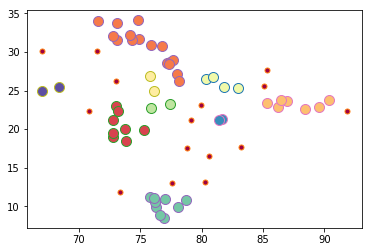

In [12]:
dbscanner(x, y, 2, 2)

Silhouette Coefficient: 0.090
Estimated number of clusters: 4
Homogeneity: 0.206
Completeness: 1.000
V-measure: 0.341
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True]


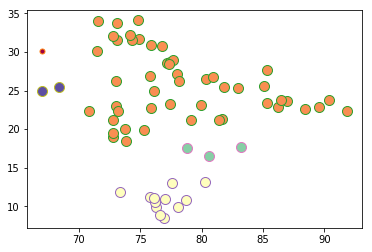

In [13]:
dbscanner(x, y, 3, 2)

## Brazil

In [14]:
brazil = pd.read_csv('brazil.csv')

In [15]:
X = brazil[['Latitude','Longitude']]
x = brazil['Latitude']
y = brazil['Longitude']

In [16]:
lgn.scatter(x, y, labels = brazil['Name'])

Silhouette Coefficient: 0.219
Estimated number of clusters: 5
Homogeneity: 0.474
Completeness: 0.966
V-measure: 0.636
[ True  True False  True False False False  True  True  True False  True
  True False False  True  True False  True  True  True False  True False
  True False]


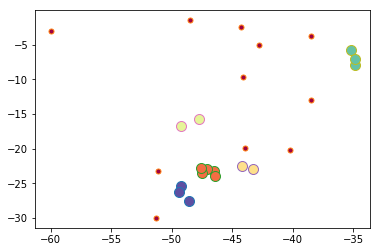

In [17]:
dbscanner(x, y, 2, 2)

Silhouette Coefficient: 0.297
Estimated number of clusters: 4
Homogeneity: 0.422
Completeness: 1.000
V-measure: 0.594
[ True  True  True  True False False False  True  True  True False  True
  True False False  True  True  True  True  True  True False  True  True
  True  True]


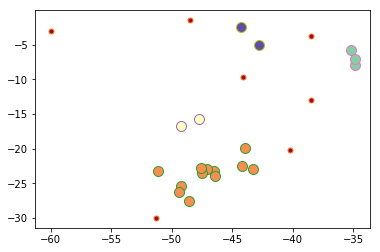

In [18]:
dbscanner(x, y, 3, 2)

Silhouette Coefficient: 0.354
Estimated number of clusters: 4
Homogeneity: 0.407
Completeness: 1.000
V-measure: 0.578
[ True  True  True  True  True  True False  True  True  True False  True
  True False  True  True  True  True  True  True  True False  True  True
  True  True]


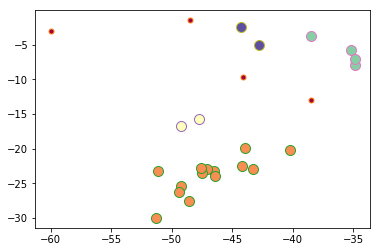

In [19]:
dbscanner(x, y, 4, 2)

# Africa

In [20]:
africa = pd.read_csv('africa.csv')

In [21]:
X = africa[['Longitude','Latitude']]
y = africa['Latitude']
x = africa['Longitude']

In [22]:
lgn.scatter(x, y, labels = africa['City'])

Silhouette Coefficient: -0.063
Estimated number of clusters: 10
Homogeneity: 0.401
Completeness: 0.987
V-measure: 0.571
[False False False  True False  True  True  True  True False False False
 False False False False  True  True False False  True  True  True False
 False False False False False False False  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True False  True
 False False False  True  True  True False False False False  True False
 False False False False False]


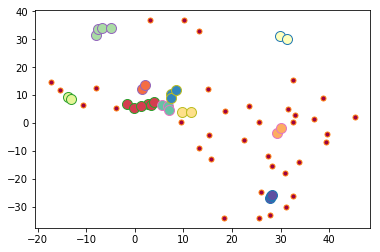

In [23]:
dbscanner(x, y, 2, 2)

Silhouette Coefficient: 0.073
Estimated number of clusters: 11
Homogeneity: 0.475
Completeness: 0.989
V-measure: 0.642
[False False False  True  True  True  True  True  True False False False
 False False False False  True  True False False  True  True  True  True
  True False  True False False False False  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True False  True
 False False  True  True  True  True False  True False  True  True False
  True False False  True  True]


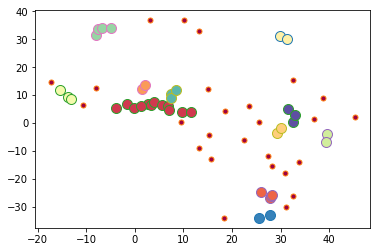

In [24]:
dbscanner(x, y, 3, 2)

Silhouette Coefficient: 0.184
Estimated number of clusters: 10
Homogeneity: 0.483
Completeness: 0.989
V-measure: 0.649
[False False False  True  True  True  True  True  True False False False
 False False  True False  True  True False  True  True  True  True  True
  True False  True  True False False False  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
 False False  True  True  True  True False  True False  True  True False
  True  True  True  True  True]


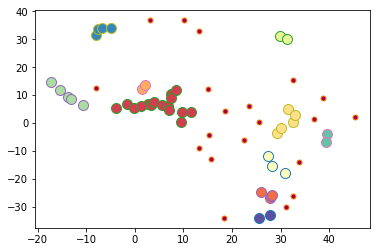

In [25]:
dbscanner(x, y, 4, 2)

# Eurasia

In [26]:
eurasia = pd.read_csv('eurasia2.csv')

In [27]:
eurasia.shape

(516, 21)

In [28]:
eurasia.head()

Name   Province      Country Continent  Population rank (core city)  \
0  Guangzhou  Guangdong        China      Asia                          NaN   
1   Shanghai   Shanghai        China      Asia                          NaN   
2  Chongqing  Chongqing        China      Asia                          NaN   
3      Seoul        NaN  South Korea      Asia                          NaN   
4    Karachi      Sindh     Pakistan      Asia                          NaN   

   Population rank (Primary Statistical Area)  \
0                                         1.0   
1                                         2.0   
2                                         3.0   
3                                         NaN   
4                                         NaN   

   Distance to closest larger Chinese Metropolitan Area (KM)   Power  \
0                                            40000.0           40000   
1                                             1230.0             615   
2                                             1000.0          333.33   
3                                                NaN             NaN   
4                                                NaN             NaN   

   Population  Population MetroPower    ...     Rolling % of Population Total  \
0    44294245           1.771770e+12    ...                             #REF!   
1    35965403           4.423745e+10    ...                             1.06%   
2    30165500           3.016550e+10    ...                             1.93%   
3    25514000                    NaN    ...                             2.65%   
4    24300000                    NaN    ...                             3.26%   

  GDP per capita of Province  Distance from a foreign country (KM)  Score  \
0                        NaN                                   NaN    NaN   
1                        NaN                                   NaN    NaN   
2                        NaN                                   NaN    NaN   
3                        NaN                                   NaN    NaN   
4                        NaN                                   NaN    NaN   

   If part of a larger city's transportation, city name  Closest City Name  \
0                                                NaN                   NaN   
1                                                NaN             Guangzhou   
2                                                NaN             Guangzhou   
3                                                NaN                   NaN   
4                                                NaN                   NaN   

  Closest City Rank  Largest in Province?   Latitude  Longitude  
0               NaN                   Yes  23.183333      113.5  
1               1.0                   Yes  31.000000      122.0  
2               1.0                   Yes  29.500000      106.4  
3               NaN                   NaN  37.600000      126.9  
4               NaN                   NaN  24.900000       67.0  

[5 rows x 21 columns]

In [29]:
eurasia = eurasia[['Name','Population','Longitude','Latitude']]

In [30]:
eurasia = eurasia.dropna()

In [31]:
X = eurasia[['Longitude','Latitude']]
x = eurasia['Longitude']
y = eurasia['Latitude']

In [32]:
lgn.scatter(x, y, labels = eurasia['Name'])

Silhouette Coefficient: 0.130
Estimated number of clusters: 45
Homogeneity: 0.456
Completeness: 0.899
V-measure: 0.605
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True False  True  True False  True  True False False  True  True  True
 False  True  True  True  True False False False  True  True False  True
  True False  True False  True  True  True  True  True  True  True  True
 False False  True  True  True False  True False  True  True  True  True
  True  True  True  True False  True  True False  True  True  True  True
  True False  True False False  True  True  True  True False  True False
  True  True  True  True  True  True  True  True False False False  True
  True  True  True False False  True  True  True  True  True  True  True
  True False  True  True  True False False  True  True  True  True  True
  True False  True False  True  True  True  True  True  True  True  True
  Tru

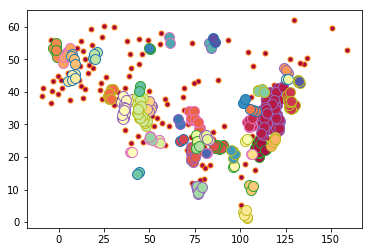

In [33]:
dbscanner(x, y, 2, 2)

Silhouette Coefficient: 0.217
Estimated number of clusters: 33
Homogeneity: 0.417
Completeness: 0.892
V-measure: 0.568
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True False  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  Tru

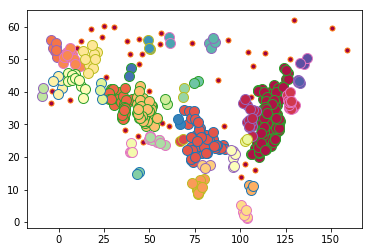

In [34]:
dbscanner(x, y, 3, 2)

In [35]:
eurasiamillion = eurasia.loc[eurasia['Population'] >= 1000000]

In [36]:
X = eurasiamillion[['Longitude','Latitude']]
x = eurasiamillion['Longitude']
y = eurasiamillion['Latitude']

In [37]:
lgn.scatter(x, y, labels = eurasiamillion['Name'])

In [38]:
eurasiamillion.shape

(345, 4)

Silhouette Coefficient: 0.080
Estimated number of clusters: 37
Homogeneity: 0.443
Completeness: 0.917
V-measure: 0.597
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True False  True  True
  True False  True  True False  True  True False False  True  True  True
 False  True  True  True False False False False  True  True False  True
 False False  True False  True  True  True  True  True  True  True  True
 False False  True  True  True False  True False  True  True  True  True
  True  True  True  True False  True  True False  True  True  True  True
  True False  True False False  True  True  True  True False  True False
  True  True  True  True  True  True  True  True False False False  True
  True  True  True False False  True False  True  True  True  True  True
  True False  True  True  True False False  True  True  True  True  True
  True False  True False  True  True  True  True False  True  True  True
  Tru

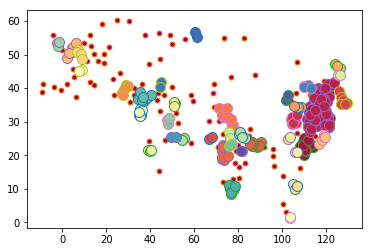

In [39]:
dbscanner(x, y, 2, 2)

In [40]:
eurasia.describe()

Population   Longitude    Latitude
count  4.520000e+02  452.000000  452.000000
mean   2.798465e+06   78.976546   34.175496
std    4.611833e+06   41.024008   11.273774
min    7.541300e+04   -9.100000    1.300000
25%    1.007150e+06   44.382500   27.232500
50%    1.375500e+06   83.475000   34.200000
75%    2.205640e+06  116.125000   40.333307
max    4.429424e+07  158.600000   62.000000

In [41]:
eurasiamillion = eurasia.loc[eurasia['Population'] >= 5000000]

In [42]:
X = eurasiamillion[['Longitude','Latitude']]
x = eurasiamillion['Longitude']
y = eurasiamillion['Latitude']

In [43]:
lgn.scatter(x, y, labels = eurasiamillion['Name'])

Silhouette Coefficient: -0.333
Estimated number of clusters: 4
Homogeneity: 0.182
Completeness: 1.000
V-measure: 0.309
[ True  True False False False  True  True False False  True False False
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False  True]


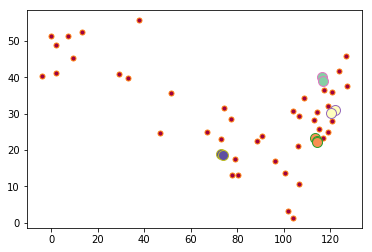

In [44]:
dbscanner(x, y, 2, 2)

Silhouette Coefficient: 0.089
Estimated number of clusters: 9
Homogeneity: 0.438
Completeness: 0.984
V-measure: 0.606
[ True  True  True False False  True  True  True  True  True  True False
  True  True False False  True False  True  True False False False False
  True False False False  True  True False  True  True False False  True
 False False  True  True  True False False False False  True False False
 False False  True]


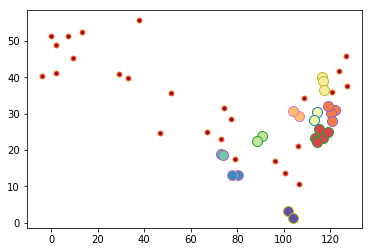

In [45]:
dbscanner(x, y, 3, 2)

# Old World

In [46]:
eurasia.columns

Index([u'Name', u'Population', u'Longitude', u'Latitude'], dtype='object')

In [47]:
africa.columns

Index([u'Rank', u'City', u'Country', u'Administrative area[1]', u'Population',
       u'Latitude', u'Longitude'],
      dtype='object')

In [48]:
eurasia['City'] = eurasia['Name']
#eurasia['Population'] = eurasia['Population MetropolitanArea']

In [49]:
africa.head()

Rank        City   Country       Administrative area[1]  Population  \
0  23.0     Algiers   Algeria     2,947,461 (2008)\nWilaya     2594000   
1   5.0      Luanda    Angola  1,823,282 (2002)\nProvincia     5506000   
2  40.0      Huambo    Angola                          NaN     1269000   
3   NaN  Porto Novo     Benin                          NaN      267191   
4   NaN    Gaborone  Botswana                          NaN      421907   

   Latitude  Longitude  
0     36.75       3.05  
1     -8.90      13.25  
2    -12.75      15.75  
3      7.00       2.60  
4    -24.65      25.90

In [50]:
africa = africa[['City','Population','Latitude','Longitude']]
eurasia = eurasia[['City','Population','Latitude','Longitude']]

In [51]:
africa.head()

City  Population  Latitude  Longitude
0     Algiers     2594000     36.75       3.05
1      Luanda     5506000     -8.90      13.25
2      Huambo     1269000    -12.75      15.75
3  Porto Novo      267191      7.00       2.60
4    Gaborone      421907    -24.65      25.90

In [52]:
eurasia.head()

City  Population   Latitude  Longitude
0  Guangzhou    44294245  23.183333      113.5
1   Shanghai    35965403  31.000000      122.0
2  Chongqing    30165500  29.500000      106.4
3      Seoul    25514000  37.600000      126.9
4    Karachi    24300000  24.900000       67.0

In [53]:
eurasia.dtypes

City           object
Population      int64
Latitude      float64
Longitude     float64
dtype: object

In [54]:
oldworld = pd.concat([africa, eurasia])

In [55]:
oldworld.shape

(517, 4)

In [56]:
oldworld.dtypes

City           object
Population      int64
Latitude      float64
Longitude     float64
dtype: object

In [57]:
eurasia['Population'].astype(float)

0      44294245.0
1      35965403.0
2      30165500.0
3      25514000.0
4      24300000.0
5      21500000.0
6      21102000.0
7      19780644.0
8      18898000.0
9      18394912.0
10     18000000.0
11     16349831.0
12     16000000.0
13     14668426.0
14     14565547.0
15     14377018.0
16     14057991.0
17     13569700.0
18     13000000.0
19     12652000.0
20     12263612.0
21     12200000.0
22     12000000.0
23     11800000.0
24     11630447.0
25     11503501.0
26     11300000.0
27     10052000.0
28      9606300.0
29      9122102.0
          ...    
444      432194.0
445      427515.0
446      421571.0
447      419053.0
448      413893.0
449      383786.0
450      381639.0
451      372095.0
452      336310.0
453      324444.0
454      321146.0
455      321106.0
456      312994.0
458      308458.0
459      292627.0
463      276538.0
464      275350.0
467      269601.0
470      263906.0
476      227857.0
478      214309.0
479      208266.0
481      182464.0
482      181728.0
485      1

In [58]:
X = oldworld[['Longitude','Latitude']]
x = oldworld['Longitude']
y = oldworld['Latitude']

In [59]:
lgn.scatter(x, y, labels = oldworld['City'])

Silhouette Coefficient: 0.086
Estimated number of clusters: 55
Homogeneity: 0.458
Completeness: 0.906
V-measure: 0.608
[False False False  True False  True  True  True  True False False False
 False False False False  True  True False False  True  True  True False
 False False False False False False False  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True False  True
 False False False  True  True  True False False False False  True False
 False False False False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True False  True  True False  True  True
 False False  True  True  True False  True  True  True  True False False
 False  True  True False  True  True False  True False  True  True  True
  True  True  True  True  True False False  True  True  True False  True
 False  True  True  True  True  True  True  True  True False  True  True
 Fals

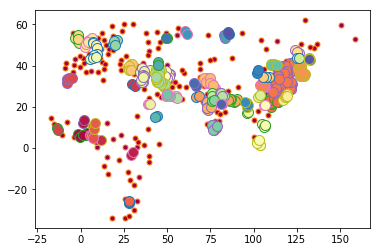

In [60]:
dbscanner(x, y, 2, 2)

Silhouette Coefficient: 0.109
Estimated number of clusters: 32
Homogeneity: 0.345
Completeness: 0.907
V-measure: 0.500
[ True False False  True  True  True  True  True  True False False False
 False False  True False  True  True False  True  True  True  True  True
  True False  True  True False False False  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
 False False  True  True  True  True False  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  Tru

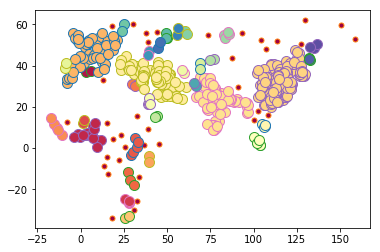

In [61]:
dbscanner(x, y, 4, 2)

In [62]:
oldworldmillion = oldworld.loc[oldworld['Population'] > 1000000]
oldworldmillion.shape

(400, 4)

In [63]:
X = oldworldmillion[['Longitude','Latitude']]
x = oldworldmillion['Longitude']
y = oldworldmillion['Latitude']

Silhouette Coefficient: 0.055
Estimated number of clusters: 47
Homogeneity: 0.450
Completeness: 0.921
V-measure: 0.605
[False False False  True  True  True False False False False False False
  True  True False  True  True  True False False False False False False
 False  True  True  True  True False  True  True  True  True  True  True
  True  True  True False False  True False False False  True  True  True
 False False False  True False False False False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True False  True  True  True False  True  True
 False  True  True False False  True  True  True False  True  True  True
 False False False False  True  True False  True False False  True False
  True  True  True  True  True  True  True  True False False  True  True
  True False  True False  True  True  True  True  True  True  True  True
 False  True  True False  True  True  True  True  True False  True False
 Fals

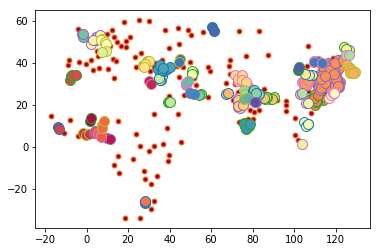

In [64]:
dbscanner(x, y, 2, 2)

Silhouette Coefficient: 0.267
Estimated number of clusters: 27
Homogeneity: 0.356
Completeness: 0.920
V-measure: 0.514
[ True False False  True  True  True False False False False  True False
  True  True False  True  True  True  True False  True  True False False
 False  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True False  True False False False  True  True  True
 False False  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 Fals

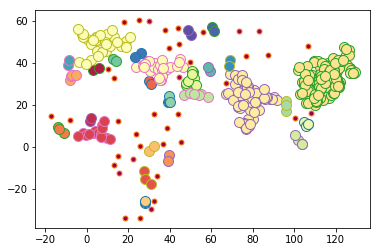

In [65]:
dbscanner(x, y, 4, 2)

In [66]:
oldworldmillion = oldworld.loc[oldworld['Population'] > 10000000]
oldworldmillion.shape

(31, 4)

In [67]:
X = oldworldmillion[['Longitude','Latitude']]
x = oldworldmillion['Longitude']
y = oldworldmillion['Latitude']

Silhouette Coefficient: -0.089
Estimated number of clusters: 3
Homogeneity: 0.208
Completeness: 1.000
V-measure: 0.344
[False False False  True  True False False False  True  True False False
 False False False  True  True False False False False False False False
 False False False False False False False]


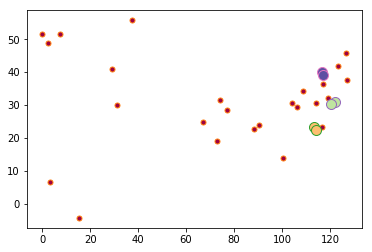

In [68]:
dbscanner(x, y, 2, 2)

# Everywhere

In [69]:
northamerica = pd.read_csv('northamericacomplete.csv')

In [70]:
northamerica.columns

Index([u'Name', u'State/Estado/Province', u'Country',
       u'Distance to closest larger city (KM)', u'60 cities Region 190 km',
       u'60 cities Region 380 km', u'60 cities Region 475 km',
       u'100 cities Region 190 km', u'Population Rank', u'Rank Power',
       u'Population Primary Statistical Area', u'Population PSAPower',
       u'Rolling population total', u'Rolling Population Percent',
       u'Politics 1 for Democrat, -1 for Republican, 2 for swing',
       u'Governor party D+ R-',
       u'Highest-ranked university ranking (US News) (200=0)',
       u'GDP per capita of State', u'Closest National Park (KM)',
       u'Distance from a foreign country (KM)', u'Score',
       u'If part of a larger city's transportation, city name',
       u'Closest City Name', u'Closest City Rank', u'Region',
       u'Current AMTRAK service?', u'Score Rank', u'Population PSA Rank',
       u'Number of Routes', u'Number of trains', u'Missing railroad?', u'Note',
       u'Latitude', u'Longitude'

In [71]:
northamerica['City'] = northamerica['Name']
northamerica['Population'] = northamerica['Population Primary Statistical Area']
northamerica = northamerica[['City','Population','Latitude','Longitude']]

In [72]:
northamerica['Longitude'] = northamerica['Longitude'] * -1

In [73]:
world = pd.concat([oldworld, northamerica])

In [74]:
world.columns

Index([u'City', u'Population', u'Latitude', u'Longitude'], dtype='object')

In [75]:
southamerica = pd.read_csv('southamerica.csv')

In [76]:
southamerica = southamerica[['City','Population','Latitude','Longitude']]

In [77]:
world = pd.concat([world, southamerica])

In [78]:
northamerica.head()

City  Population  Latitude  Longitude
0  Aguascalientes      932298   21.8760   -102.296
1      Birmingham     1309818   33.5000    -86.800
2      Huntsville      679743   34.7500    -86.500
3          Mobile      604726   30.7500    -88.000
4      Montgomery      377149   32.3333    -86.250

In [79]:
oldworld.head()

City  Population  Latitude  Longitude
0     Algiers     2594000     36.75       3.05
1      Luanda     5506000     -8.90      13.25
2      Huambo     1269000    -12.75      15.75
3  Porto Novo      267191      7.00       2.60
4    Gaborone      421907    -24.65      25.90

In [80]:
world = world.dropna()

In [81]:
X = world[['Longitude','Latitude']]
x = world['Longitude']
y = world['Latitude']

In [82]:
world.head()

City Population  Latitude  Longitude
0     Algiers    2594000     36.75       3.05
1      Luanda    5506000     -8.90      13.25
2      Huambo    1269000    -12.75      15.75
3  Porto Novo     267191      7.00       2.60
4    Gaborone     421907    -24.65      25.90

In [83]:
world.shape

(868, 4)

In [84]:
lgn.scatter(x, y, labels = world['City'])

Silhouette Coefficient: 0.062
Estimated number of clusters: 83
Homogeneity: 0.447
Completeness: 0.866
V-measure: 0.589
[False False False  True False  True  True  True  True False False False
 False False False False  True  True False False  True  True  True False
 False False False False False False False  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True False  True
 False False False  True  True  True False False False False  True False
 False False False False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True False  True  True False  True  True
 False False  True  True  True False  True  True  True  True False False
 False  True  True False  True  True False  True False  True  True  True
  True  True  True  True  True False False  True  True  True False  True
 False  True  True  True  True  True  True  True  True False  True  True
 Fals

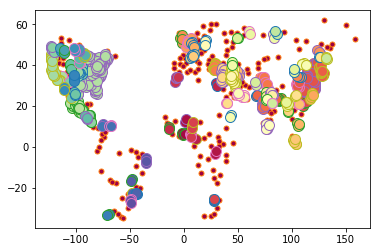

In [85]:
dbscanner(x, y, 2, 2)

In [86]:
world.shape

(868, 4)

In [87]:
worldmillion = world.loc[world['Population'] > 1000000]
worldmillion.shape

(533, 4)

In [88]:
X = worldmillion[['Longitude','Latitude']]
x = worldmillion['Longitude']
y = worldmillion['Latitude']

In [89]:
lgn.scatter(x, y, labels = worldmillion['City'])

Silhouette Coefficient: 0.024
Estimated number of clusters: 72
Homogeneity: 0.470
Completeness: 0.904
V-measure: 0.619
[False False False  True  True  True False False False False False False
  True  True False  True  True  True False False False False False False
 False  True  True  True  True False  True  True  True  True  True  True
  True  True  True False False  True False False False  True  True  True
 False False False  True False False False False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True False  True  True  True False  True  True
 False  True  True False False  True  True  True False  True  True  True
 False False False False  True  True False  True False False  True False
  True  True  True  True  True  True  True  True False False  True  True
  True False  True False  True  True  True  True  True  True  True  True
 False  True  True False  True  True  True  True  True False  True False
 Fals

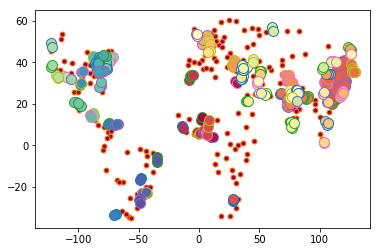

In [90]:
dbscanner(x, y, 2, 2)

Silhouette Coefficient: 0.161
Estimated number of clusters: 59
Homogeneity: 0.477
Completeness: 0.906
V-measure: 0.625
[False False False  True  True  True False False False False False False
  True  True False  True  True  True  True False  True False False False
 False  True  True  True  True False  True  True  True  True  True  True
  True  True  True False False  True False False False  True  True  True
 False False  True  True False False False False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True False  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
 Fals

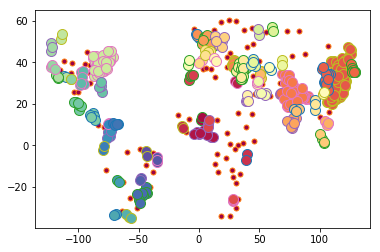

In [91]:
dbscanner(x, y, 3, 2)